#### Setup

In [1]:
import pandas as pd, matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the data
df = pd.read_csv('accounts.csv')
X = df.drop('deposit', axis=1)
X = X.iloc[:, :8].drop_duplicates().dropna()
X = pd.get_dummies(X, drop_first=True)
Y = pd.get_dummies(df['deposit'], drop_first=True)

#### 1. Normalize the data using MinMaxScaler:

>a. Using sklearn, apply k-means clustering (without targets) on the normalized data with $k=\{2,3,4,5,6,7,8\}$, max_iter=500 and random_state=42. Plot the different sum of squared errors (SSE) using the _inertia attribute of k-means according to the number of clusters.

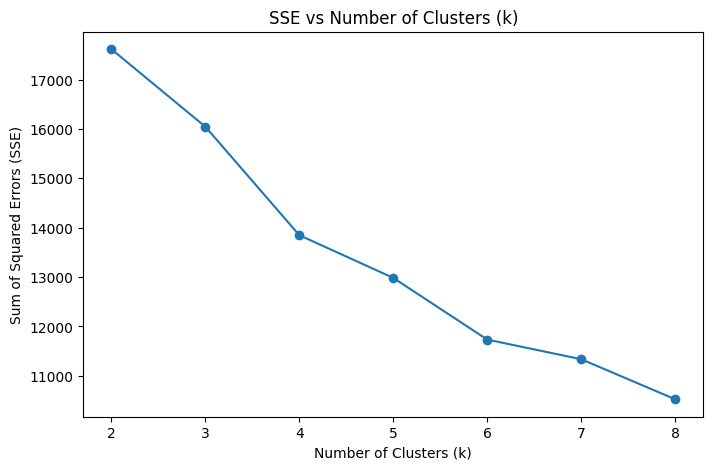

In [24]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

sse = []
k_values = range(2, 9)

# Apply k-means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit_predict(X_normalized)
    sse.append(kmeans.inertia_)
    
# Plot the SSE for each k
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('SSE vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

>b.  According to the previous plot, how many underlying customer segments (clusters) should there be? Explain based on the trade-off between the clusters and inertia.

According to the plot, and using the knee/elbow finding method we come to the conclusion that the ideal number of clusters is 4. This method consists of finding the point where the decrease in SSE becomes less accentuated with the increase of clusters. 

For all values before this point, the model might suffer from underfitting and for values above, the increase in the number of clusters and complexity does not provide substantial improvements to the model. Not only does it not justify, it also contributes to overfitting the data.


>c. Would k-modes be a better clustering approach? Explain why based on the dataset features.

K-modes is an adaptation of k-means used to handle categorical features. It uses the mode (most frequent value) instead of means to represent the centroid of the cluster and uses distance based in dissimilarity (like Hamming Distance) to group the data.

Given that our dataset's features are predominantly categorical (10 categorical out of 17), in theory, k-modes would be a better clustering approach, considering the explanation above. 

#### 2. Normalize the data using StandardScaler: 

>a. Apply PCA to the data. How much variability is explained by the top 2 components?

In [2]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X_normalized)

variance_explained = pca.explained_variance_ratio_

print("The first component explains", round(variance_explained[0], 5), "variability in the data set.")
print("The second component explains", round(variance_explained[1], 5), "variability in the data set.")
print("The top 2 components explain", round(variance_explained[1] + variance_explained[0], 5), "variability in the data set.")

The first component explains 0.11679 variability in the data set.
The second component explains 0.11076 variability in the data set.
The top 2 components explain 0.22755 variability in the data set.


>b. Apply k-means clustering with k=3 and random_state=42 (all other arguments as default) and use the original 8 features. Next, provide a scatterplot according to the first 2 principal components. Can we clearly separate the clusters? Justify.

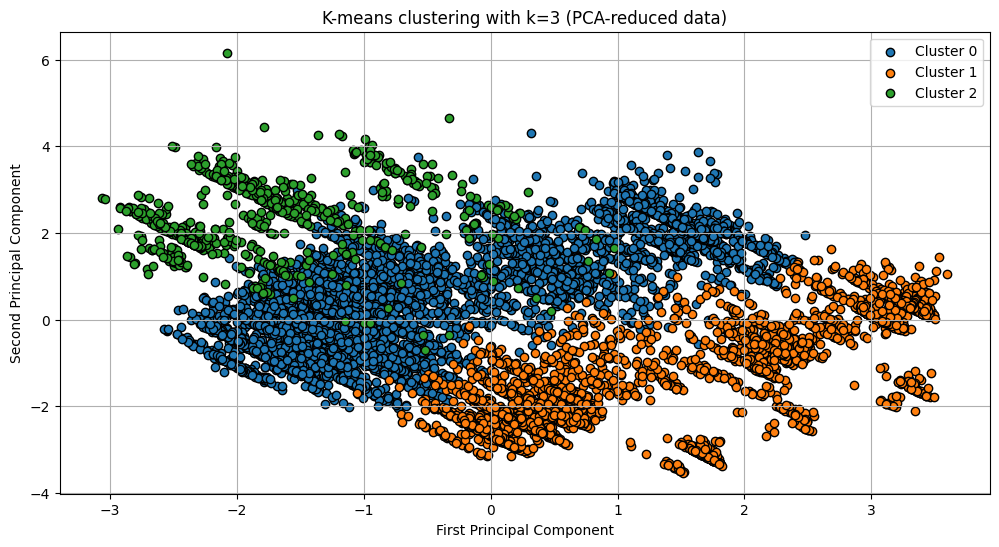

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_normalized)
labels = kmeans.labels_
X_projected = pca.fit_transform(X_normalized)

plt.figure(figsize=(12, 6))
for cluster in range(3):
    plt.scatter(X_projected[labels == cluster, 0], X_projected[labels == cluster, 1], label=f'Cluster {cluster}', edgecolors='k')

plt.title('K-means clustering with k=3 (PCA-reduced data)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid()
plt.legend()
plt.show()

We can clearly separate all the three clusters. There is still a bit of overlap between some of them but most of the points are relatively close to their supposed cluster. 
The overlap can happen because we are losing a lot of information on the data variance by only considering the top two components to draw the plot. It can suggest that using only these two components in a 2D space isn’t enough to represent some of the variance between the different observations of the dataset, that might become more apparent in higher dimensional spaces.

>c. Plot the cluster conditional features of the frequencies of “job” and ”education” according to the clusters obtained in the previous question (2b.). Use sns.displot (see Data Exploration notebook), with multiple="dodge", stat='density', shrink=0.8 and common_norm=False. Describe the main differences between the clusters in no more than half a page.

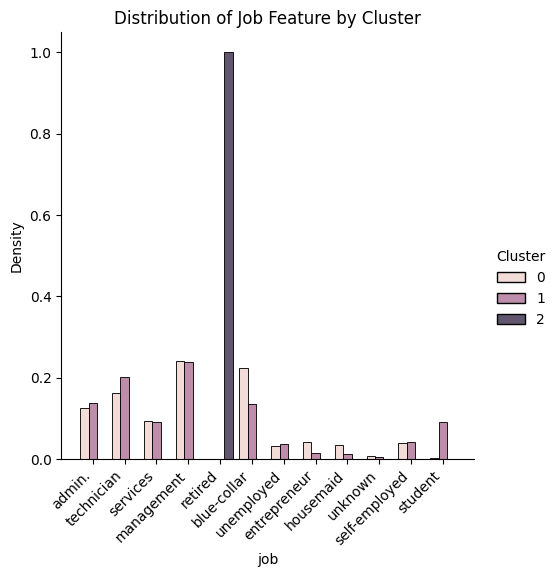

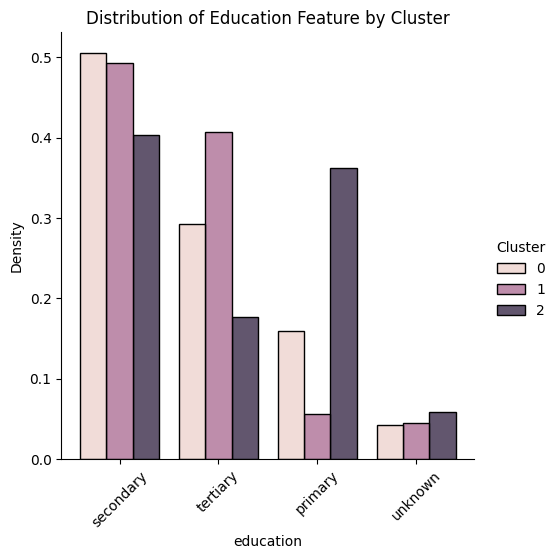

In [5]:
# Getting the dataframe with the job and education columns (get_dummies removes such column's names)
df_labeled = pd.DataFrame(df[['job', 'education']]).loc[X.index]
df_labeled['Cluster'] = labels

# Plot the 'job' feature distribution across clusters
sns.displot(df_labeled, x="job", hue="Cluster", multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title('Distribution of Job Feature by Cluster')
plt.xticks(rotation=45, ha = 'right')
plt.show()

# Plot the 'education' feature distribution across clusters
sns.displot(df_labeled, x="education", hue="Cluster", multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title('Distribution of Education Feature by Cluster')
plt.xticks(rotation=45)
plt.show()


The main differences in the obtained plots can be described as follows:
* Jobs
    
   * Cluster 0: Jobs like “services”, “management”, “blue-collar”, “entrepreneur” and “housemaid” appear mostly in this cluster. These jobs usually require less technical knowledge and might translate to a lesser income than some others in this list.
   
   * Cluster 1: Jobs like “technician”, “admin” and “student” appear mostly in this cluster. This can indicate that a certain level of education and technical knowledge is common to the people that are part of this cluster’s population.
  
   * Cluster 2: Fully represented by people in the “retired” category. In terms of income, it is represented by a demographic of people with fixed income.

* Education
   * Cluster 0: People with “secondary” level of education appear in a higher portion in this cluster. It represents a good correlation with the results in the first graph, where this cluster is associated with less technical jobs and lower income levels.
   
   * Cluster 1: People with “tertiary” level of education appear mostly in this cluster. There’s also a big portion of people with “secondary” level. Once again, this graph further explains the association between this cluster and more technical jobs with higher income.
   
   * Cluster 2: Highly characterized by people with “primary” level of education and also some of “secondary” level. This distribution fits perfectly with the idea of older and “retired” individuals, who mostly entered the job market with smaller education levels when compared to today’s generation.